# Ternary Tree Implementations

A ternary search tree has nodes with the following attributes:
* a character, can be `None`;
* a Boolean flag that indicates whether the character represented
  by this node has been the last in a string that was inserted in the
  tree;
* the "less-than" child;
* the "equals" child and
* the "larger-than" child.

The data structure support the following operations:
* string insert
* string search
* prefix string search
* return the number of strings stored in the data structure
* return all strings stored in the data structure

In this file we can test the performance of multiple TST structures, for various datasets and assess the time every execution takes. 

In [ ]:
import random
import time
import matplotlib.pyplot as plt
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout

from trees.ternary_tree import TernarySearchTree
from trees.ternary_tree_B import TernarySearchTreeB
from trees.ternary_tree_minimalistic import TernarySearchTreeSparse 
from trees.ternary_tree_recursive import TernarySearchTreeRecursive
from trees.btree import Btree


with open('data/corncob_lowercase.txt') as file:
    words = [line.strip() for line in file]
    
with open('data/words_alpha.txt') as file:
    words = [line.strip() for line in file]
    
sizes = [10, 100, 1000, 10000, 50000, 100000, 300000]  ## increasing the sample size with the words_alpha dataset
samples = [
    random.sample(words, k=size) for size in sizes
]

# Insertion time Assessment

We will first assess the insertion time for each tree.

In [23]:
nr_runs = 100
times = {"recursive": {}, "iterative": {}, "sparse": {}, "btree": {}}
insert_sample = random.sample(words, k=20)
for sample in samples:
    tsts = {
    "recursive": TernarySearchTree(),
    "iterative": TernarySearchTreeB(),
    "sparse": TernarySearchTreeSparse(),
    "btree": Btree()
    }
    for word in sample:
        for tst_name, tst in tsts.items():
            tst.insert(word)
    
    for tst_name in tsts.keys():
        times[tst_name][len(sample)] = 0.0
        
    for _ in range(nr_runs):
        for tst_name, tst in tsts.items():
            start_time = time.time_ns()
            for word in insert_sample:
                tst.insert(word)
            end_time = time.time_ns()
            times[tst_name][len(sample)] += end_time - start_time
    
    for tst_name in tsts.keys():
        times[tst_name][len(sample)] /= nr_runs * 1_000_000.0

times

{'recursive': {10: 0.046542,
  100: 0.273059,
  1000: 0.191299,
  10000: 0.197514,
  50000: 0.177766,
  100000: 0.266524,
  300000: 0.246296},
 'iterative': {10: 0.466062,
  100: 0.020035,
  1000: 0.097747,
  10000: 0.035276,
  50000: 0.04892,
  100000: 0.027043,
  300000: 0.374103},
 'sparse': {10: 0.031528,
  100: 0.051489,
  1000: 0.0,
  10000: 0.195625,
  50000: 0.393661,
  100000: 0.291647,
  300000: 0.181061},
 'btree': {10: 0.21611,
  100: 0.030139,
  1000: 0.150386,
  10000: 0.203242,
  50000: 0.017426,
  100000: 0.10158,
  300000: 0.167139}}

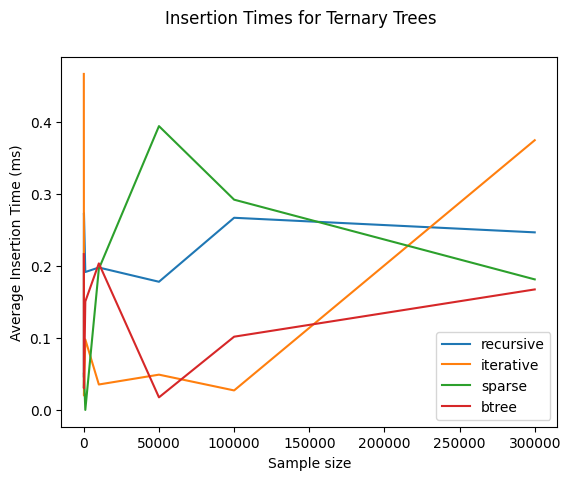

In [24]:
for tst_name, time_data in times.items():
    plt.plot(time_data.keys(), time_data.values(), label=tst_name)
    
plt.xlabel("Sample size")
plt.ylabel("Average Insertion Time (ms)")
plt.suptitle("Insertion Times for Ternary Trees")
plt.legend()


# Exact Searching time Assessment

We assess the exact searching time for each tree.

In [25]:
nr_runs = 100
times = {"recursive": {}, "iterative": {}, "sparse": {}, "btree": {}}
exact_search_sample = random.sample(words, k=20)

for sample in samples:
    tsts = {
    "recursive": TernarySearchTree(),
    "iterative": TernarySearchTreeB(),
    "sparse": TernarySearchTreeSparse(),
    "btree": Btree()
    }
    for word in sample:
        for tst_name, tst in tsts.items():
            tst.insert(word)
    
    for tst_name in tsts.keys():
        times[tst_name][len(sample)] = 0.0
        
    for _ in range(nr_runs):
        for tst_name, tst in tsts.items():
            start_time = time.time_ns()
            for word in exact_search_sample:
                tst.search(word, exact=True)
            end_time = time.time_ns()
            times[tst_name][len(sample)] += end_time - start_time
    
    for tst_name in tsts.keys():
        times[tst_name][len(sample)] /= nr_runs * 1_000_000.0

times

{'recursive': {10: 0.016249,
  100: 0.014232,
  1000: 0.117966,
  10000: 0.081841,
  50000: 0.269808,
  100000: 0.099956,
  300000: 0.283062},
 'iterative': {10: 0.028789,
  100: 0.0,
  1000: 0.080263,
  10000: 0.065302,
  50000: 0.109446,
  100000: 0.366535,
  300000: 0.042482},
 'sparse': {10: 0.010632,
  100: 0.0586,
  1000: 0.138668,
  10000: 0.325053,
  50000: 0.129188,
  100000: 0.214209,
  300000: 0.209892},
 'btree': {10: 0.083106,
  100: 0.109506,
  1000: 0.157945,
  10000: 0.278194,
  50000: 0.386031,
  100000: 0.030308,
  300000: 0.163474}}

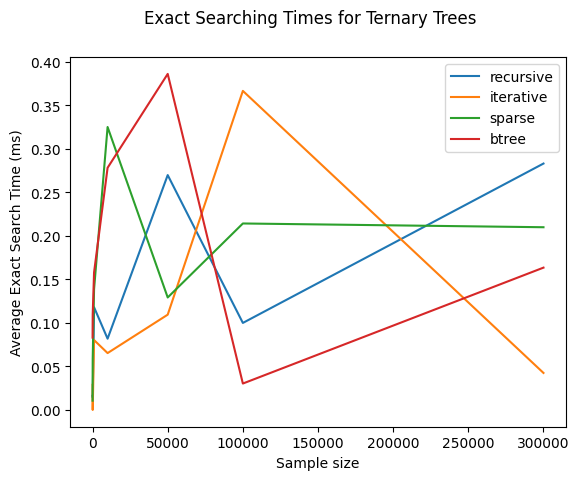

In [26]:
for tst_name, time_data in times.items():
    plt.plot(time_data.keys(), time_data.values(), label=tst_name)
    
plt.xlabel("Sample size")
plt.ylabel("Average Exact Search Time (ms)")
plt.suptitle("Exact Searching Times for Ternary Trees")
plt.legend()


# Prefixes Searching time Assessment

We assess the searching time for prefixes for each tree.

In [27]:
nr_runs = 100
times = {"recursive": {}, "iterative": {}, "sparse": {}, "btree": {}}
search_sample = random.sample(words, k=20)

for sample in samples:
    tsts = {
    "recursive": TernarySearchTree(),
    "iterative": TernarySearchTreeB(),
    "sparse": TernarySearchTreeSparse(),
    "btree": Btree()   
    }
    for word in sample:
        for tst_name, tst in tsts.items():
            tst.insert(word)
    
    for tst_name in tsts.keys():
        times[tst_name][len(sample)] = 0.0
        
    for _ in range(nr_runs):
        for tst_name, tst in tsts.items():
            start_time = time.time_ns()
            for word in search_sample:
                tst.search(word, exact=False)
            end_time = time.time_ns()
            times[tst_name][len(sample)] += end_time - start_time
    
    for tst_name in tsts.keys():
        times[tst_name][len(sample)] /= nr_runs * 1_000_000.0

times

{'recursive': {10: 0.068501,
  100: 0.198891,
  1000: 0.0,
  10000: 0.14476,
  50000: 0.16445,
  100000: 0.272887,
  300000: 0.156001},
 'iterative': {10: 0.0,
  100: 0.121118,
  1000: 0.078118,
  10000: 0.15905,
  50000: 0.17042,
  100000: 0.087809,
  300000: 0.161216},
 'sparse': {10: 0.052042,
  100: 0.163827,
  1000: 0.303629,
  10000: 0.062493,
  50000: 0.124038,
  100000: 0.228894,
  300000: 0.130394},
 'btree': {10: 0.041288,
  100: 0.129855,
  1000: 0.092016,
  10000: 0.246245,
  50000: 0.227167,
  100000: 0.218912,
  300000: 0.160254}}

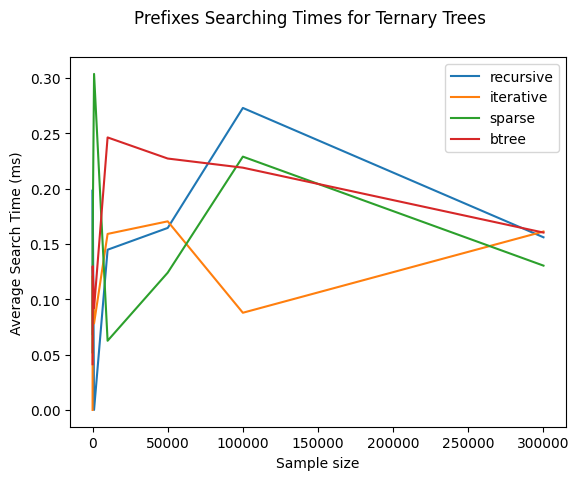

In [28]:
for tst_name, time_data in times.items():
    plt.plot(time_data.keys(), time_data.values(), label=tst_name)
    
plt.xlabel("Sample size")
plt.ylabel("Average Search Time (ms)")
plt.suptitle("Prefixes Searching Times for Ternary Trees")
plt.legend()


## Graphical Representation of the Tree

We displayed graphical representations of the ternary tree and the binary tree using the `insert_words` dataset.

In [6]:
class TSTVisualizer:
    def __init__(self, tst):
        self.graph = nx.DiGraph()
        self._build_graph(tst._root, None, "")

    def _build_graph(self, node, parent, prefix):
        if node and node._character:
            node_label = f"{prefix}{node._character}"
            self.graph.add_node(node_label)
            
            if parent:
                self.graph.add_edge(parent, node_label)

            self._build_graph(node._lt, node_label, prefix)
            self._build_graph(node._equals, node_label, prefix + node._character)
            self._build_graph(node._gt, node_label, prefix)

    def visualize(self):
        pos = graphviz_layout(self.graph, prog="dot")  # Use Graphviz hierarchical layout
        plt.figure(figsize=(8, 6))
        nx.draw(self.graph, pos, with_labels=True, node_color="lightblue", edge_color="gray", font_size=8, node_size=100, arrows=True)
        plt.title("Ternary Search Tree Structure")
        plt.show()

class BtreeVisualizer:
    def __init__(self, btree):
        self.graph = nx.DiGraph()
        self._build_graph(btree._root, None)

    def _build_graph(self, node, parent):
        if node:
            node_label = node._string
            self.graph.add_node(node_label)

            if parent:
                self.graph.add_edge(parent, node_label)

            self._build_graph(node._lt, node_label)
            self._build_graph(node._gt, node_label)

    def visualize(self):
        pos = graphviz_layout(self.graph, prog="dot")  # Use hierarchical layout
        plt.figure(figsize=(8, 6))
        nx.draw(self.graph, pos, with_labels=True, node_color="lightblue", edge_color="gray",
                font_size=8, node_size=1000, arrows=True)
        plt.title("Binary Search Tree Structure")
        plt.show()


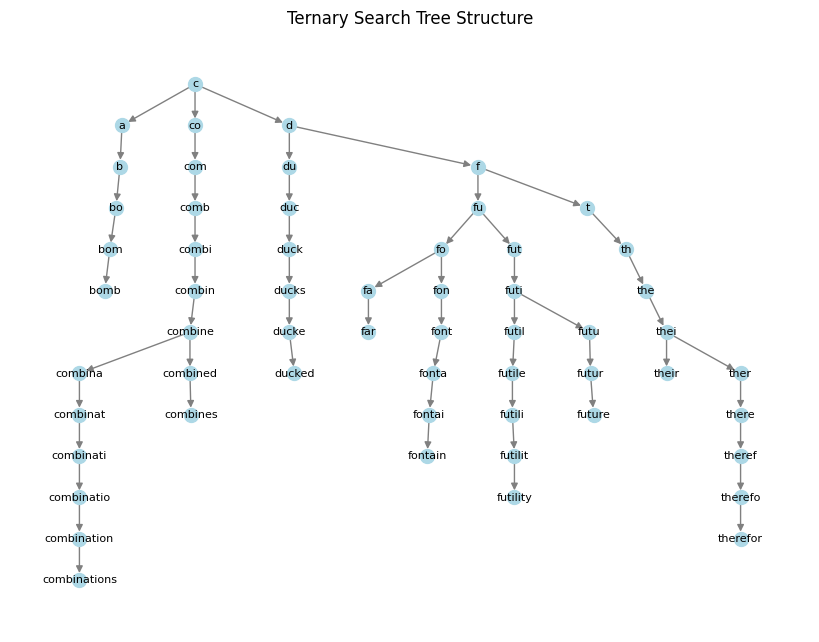

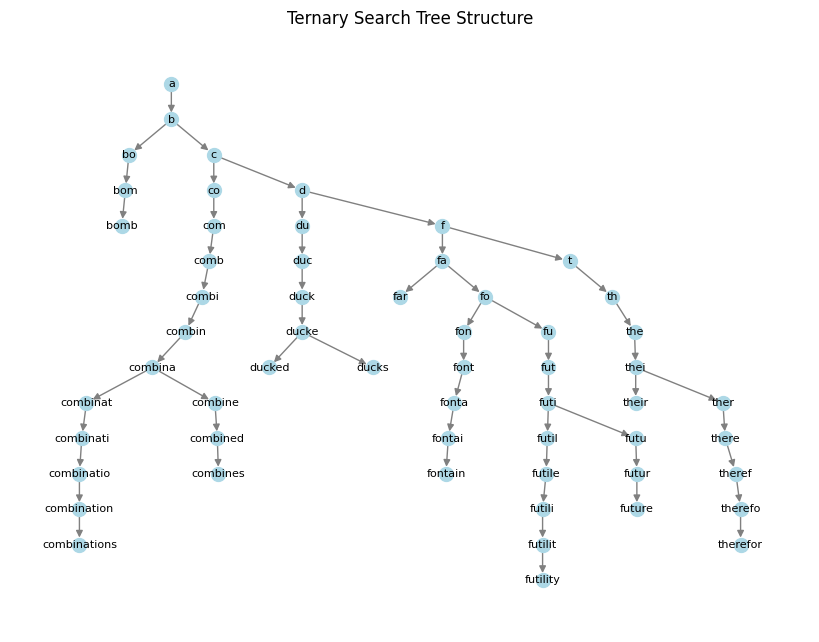

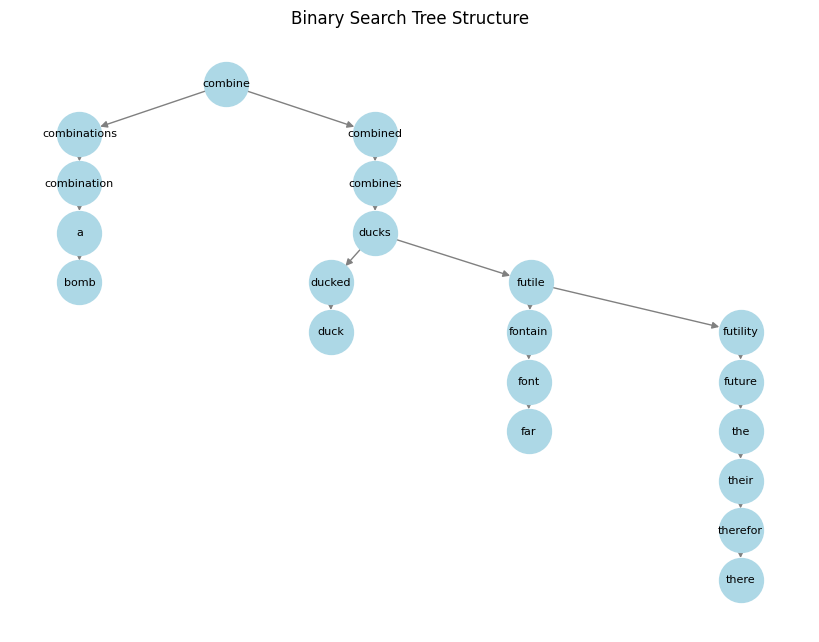

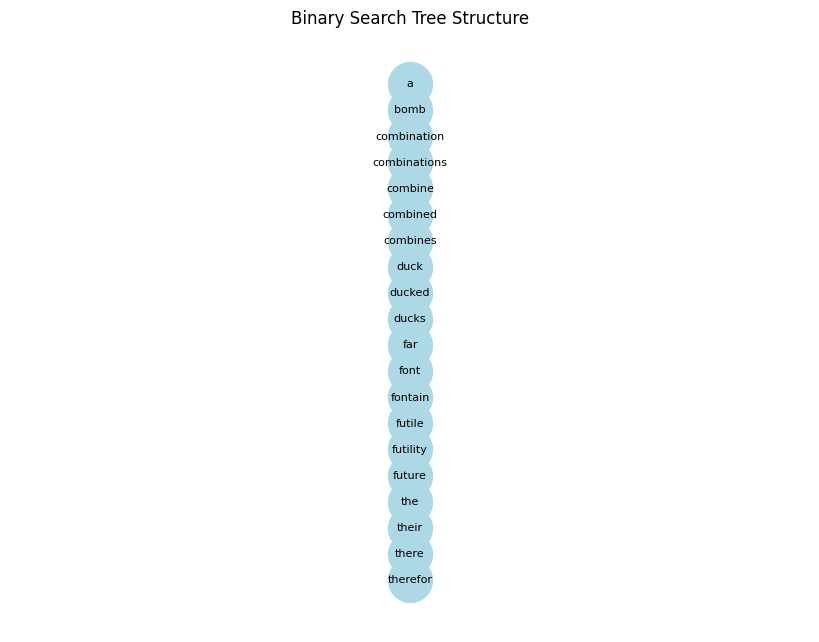

In [ ]:
tst = TernarySearchTree()
tst2 = TernarySearchTree()
bt = Btree()
bt2 = Btree()

with open('data/insert_words.txt') as file:
    words = [line.strip() for line in file]

insert_sample = sorted(words)
for word in words:
    tst.insert(word)
    bt.insert(word)

for word in insert_sample:
    tst2.insert(word)
    bt2.insert(word)

visualizer = TSTVisualizer(tst)
visualizer.visualize()          # unsorted list
visualizer2 = TSTVisualizer(tst2)
visualizer2.visualize()         # sorted list
visualizer3 = BtreeVisualizer(bt)
visualizer3.visualize()         # unsorted list
visualizer4 = BtreeVisualizer(bt2)
visualizer4.visualize()         # sorted list